In [34]:
import numpy as np
import pandas as pd


In [35]:
class KMeans:
    def __init__(self,k = 5, epochs = 100):
        self.k = k
        self.epochs = epochs

        #indices of each clustures
        self.clusters = [[] for _ in range(self.k)]

        #mean of each cluster
        self.centroids = []

    def predict(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_samples = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[ind] for ind in random_samples]

        for _ in range(self.epochs):
            self.clusters = self.create_clusters(self.centroids)

            centroids_old = self.centroids
            self.centroids = self.new_centroids(self.clusters)

            if self.is_converged(centroids_old, self.centroids):
                break

        return self.get_cluster_lables(self.clusters)

    def create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx,sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def closest_centroid(self,sample,centroids):
        distances = [self.euclidean_distance(sample, point) for point in centroids]
        return np.argmin(distances)

    def new_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def is_converged(self, old, new):
        distances = [self.euclidean_distance(old[i],new[i]) for i in range(self.k)]
        return sum(distances) == 0

    def get_cluster_lables(self,clusters):
        lables = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                lables[sample_idx] = cluster_idx

        return lables
    
    def euclidean_distance(self,x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))

(500, 2)


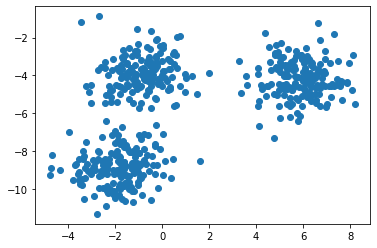

In [36]:
from sklearn.datasets import make_blobs
np.random.seed(42)
X,y = make_blobs(centers=3, n_samples=500,n_features=2, shuffle=True, random_state=40)
print(X.shape)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])



In [37]:
clusters = len(np.unique(y))
print(clusters)
k = KMeans(k=clusters,epochs=150)
y_pred = k.predict(X)
print(y_pred)

3
[0. 2. 1. 1. 2. 2. 0. 0. 0. 0. 2. 2. 1. 0. 2. 1. 2. 2. 0. 1. 0. 2. 2. 2.
 0. 0. 0. 2. 0. 1. 2. 0. 2. 1. 1. 0. 2. 1. 0. 0. 2. 0. 2. 2. 1. 1. 1. 1.
 2. 2. 1. 1. 0. 1. 1. 2. 1. 2. 1. 2. 0. 1. 2. 0. 1. 0. 0. 2. 2. 1. 1. 0.
 2. 1. 0. 2. 2. 0. 2. 1. 0. 1. 1. 2. 1. 2. 0. 1. 1. 0. 0. 0. 2. 0. 1. 2.
 1. 0. 1. 2. 1. 2. 1. 2. 2. 0. 2. 2. 2. 1. 1. 1. 2. 2. 2. 0. 2. 0. 0. 2.
 1. 1. 2. 1. 2. 0. 1. 2. 2. 2. 2. 1. 1. 1. 2. 0. 2. 1. 2. 2. 0. 1. 2. 0.
 0. 2. 0. 0. 0. 0. 2. 2. 2. 2. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 2. 0. 1. 1.
 2. 2. 0. 1. 2. 1. 1. 1. 1. 1. 1. 0. 2. 1. 2. 0. 2. 0. 1. 0. 2. 2. 1. 1.
 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 2. 2. 2. 0. 0. 0. 1. 2. 2. 2. 2. 0. 1. 0.
 2. 1. 0. 0. 1. 2. 1. 1. 1. 2. 2. 1. 1. 0. 1. 2. 0. 2. 1. 1. 2. 2. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 2. 2. 1. 1. 0. 1. 2. 2. 2. 2. 2. 2.
 0. 2. 1. 1. 0. 2. 0. 0. 0. 1. 0. 1. 2. 1. 2. 1. 2. 0. 0. 1. 1. 1. 2. 0.
 0. 1. 1. 0. 2. 2. 0. 0. 0. 1. 2. 2. 1. 1. 2. 1. 0. 2. 2. 1. 0. 0. 2. 2.
 2. 0. 2. 1. 1. 2. 0. 0. 2. 0. 0. 0. 0. 2. 0. 1. 

In [38]:
print(y)

[0 1 2 2 1 1 0 0 0 0 1 1 2 0 1 2 1 1 0 2 0 1 1 1 0 0 0 1 0 2 1 0 1 2 2 0 1
 2 0 0 1 0 1 1 2 2 2 2 1 1 2 2 0 2 2 1 2 1 2 1 0 2 1 0 2 0 0 1 1 2 2 0 1 2
 0 1 1 0 1 2 0 2 2 1 2 1 0 2 2 0 0 0 1 0 2 1 2 0 2 1 2 1 2 1 1 0 1 1 1 2 2
 2 1 1 1 0 1 0 0 1 2 2 1 2 1 0 2 1 1 1 1 2 2 2 1 0 1 2 1 1 0 2 1 0 0 1 0 0
 0 0 1 1 1 1 0 2 2 2 0 2 2 0 2 2 1 0 2 2 1 1 2 2 1 2 2 2 2 2 2 0 1 2 1 0 1
 0 2 0 1 1 2 2 0 1 2 2 0 2 2 0 0 2 1 1 1 0 0 0 2 1 1 1 1 0 2 0 1 2 0 0 2 1
 2 2 2 1 1 2 2 2 2 1 0 1 2 2 1 1 0 0 2 2 0 0 0 2 2 0 0 2 0 2 1 1 2 2 0 2 1
 1 1 1 1 1 0 1 2 2 0 1 0 0 0 2 0 2 1 2 1 2 1 0 0 2 2 2 1 0 0 2 2 0 1 1 0 0
 0 2 1 1 2 2 1 2 0 1 1 2 0 0 1 1 1 0 1 2 2 1 0 0 1 0 0 0 0 1 0 2 1 0 0 2 2
 1 0 0 2 2 2 0 2 1 0 1 2 0 2 1 1 0 1 2 2 2 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 1
 1 2 1 1 2 0 0 1 1 1 2 0 0 2 1 0 1 1 1 1 0 0 1 2 2 1 1 0 2 1 2 2 0 0 1 2 2
 2 1 0 2 2 0 1 2 1 1 0 0 0 2 0 0 0 2 1 2 1 2 1 0 1 0 1 1 1 2 2 2 2 1 1 0 2
 1 0 2 0 2 2 2 2 2 1 0 0 0 0 0 0 1 1 1 2 1 0 0 0 2 2 0 2 0 0 2 1 0 2 0 0 0
 1 0 0 1 0 2 0 0 1 1 0 1 